The regression coefficients are 24.815544052284988 43.4989785533412


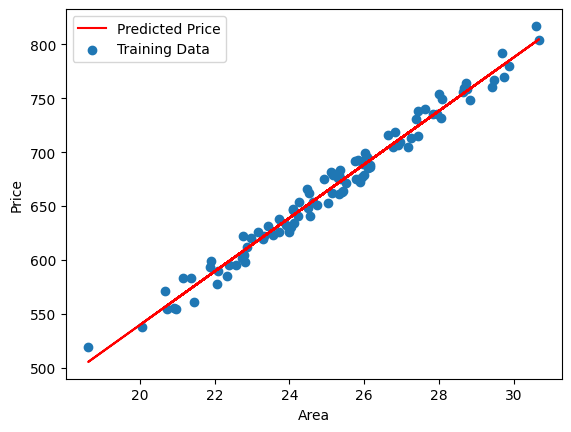

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area', 'price'])

W = sum(price * (area - np.mean(area))) / sum((area - np.mean(area)) ** 2)
b = np.mean(price) - W * np.mean(area)

print("The regression coefficients are", W, b)

y_pred = W * area + b

plt.plot(area, y_pred, color='red', label='Predicted Price')
plt.scatter(data['area'], data['price'], label='Training Data')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()



# matplot, numpy, pandas 정리

# 다중 선형회귀

평균 제곱 오차(MSE)를 예측값 $\hat{Y}$와 실제값 $Y$로 정의할 때, $\hat{Y}$는 각 특성값에 해당하는 가중치를 곱한 후 합산한 값에 바이어스를 더한 값으로 나타낼 수 있습니다.

선형 회귀 모델의 예측값 $\hat{Y}$는 다음과 같이 정의됩니다:

$\hat{Y} = W^T X + b$

여기서:
- $W$는 가중치 벡터
- $X$는 입력 벡터
- $b$는 바이어스 (절편)
- $W^T X$는 가중치 벡터 $W$와 입력 벡터 $X$의 내적

각 데이터 포인트 $i$에 대해 예측값 $\hat{Y}_i$는 다음과 같습니다:

$\hat{Y}_i = W^T X_i + b$

이제 MSE를 전체 데이터에 대해 계산하는 식은 다음과 같습니다:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i - Y_i)^2$

여기서 $\hat{Y}_i$를 위의 선형 회귀 모델의 예측값으로 대체하면:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( (W^T X_i + b) - Y_i \right)^2$

이를 파이썬 코드로 구현하면 다음과 같습니다:

```python
import numpy as np

def mean_squared_error(W, X, b, Y_true):
    # 예측값 계산
    Y_pred = np.dot(X, W) + b
    # MSE 계산
    return np.mean((Y_pred - Y_true) ** 2)

# 예제 데이터
np.random.seed(0)
X = np.random.randn(100, 3)  # 100개의 데이터 포인트와 3개의 특성
W = np.random.randn(3)       # 3개의 가중치
b = np.random.randn(1)       # 1개의 바이어스
Y_true = np.dot(X, W) + b + np.random.randn(100) * 0.5  # 실제값에 약간의 노이즈 추가

# MSE 계산
mse = mean_squared_error(W, X, b, Y_true)
print(f"Mean Squared Error: {mse}")
```


In [2]:
import numpy as np

def mean_squared_error(W, X, b, Y_true):
    # 예측값 계산
    Y_pred = np.dot(X, W) + b
    # MSE 계산
    return np.mean((Y_pred - Y_true) ** 2)

# 예제 데이터
np.random.seed(0)
X = np.random.randn(100, 3)  # 100개의 데이터 포인트와 3개의 특성
W = np.random.randn(3)       # 3개의 가중치
b = np.random.randn(1)       # 1개의 바이어스
Y_true = np.dot(X, W) + b + np.random.randn(100) * 0.5  # 실제값에 약간의 노이즈 추가

# MSE 계산
mse = mean_squared_error(W, X, b, Y_true)
print(f"Mean Squared Error: {mse}")
print(W, b)


Mean Squared Error: 0.21907075702581888
[-1.30652685  1.65813068 -0.11816405] [-0.6801782]


Iteration 0, MSE: 3.139517076405602
Iteration 100, MSE: 0.3178535403828515
Iteration 200, MSE: 0.2067367312081051
Iteration 300, MSE: 0.20181509520300797
Iteration 400, MSE: 0.20158956563846217
Iteration 500, MSE: 0.20157911591466882
Iteration 600, MSE: 0.2015786296559813
Iteration 700, MSE: 0.20157860698640534
Iteration 800, MSE: 0.20157860592862023
Iteration 900, MSE: 0.20157860587924237
Final weights: [-1.22300236  1.6781555  -0.11068018]
Final bias: [-0.78889489]


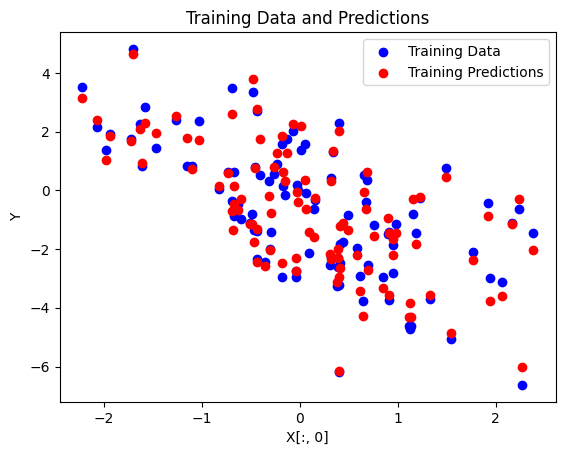

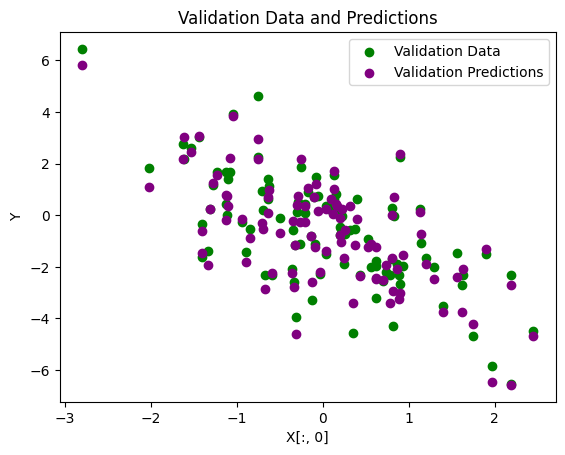

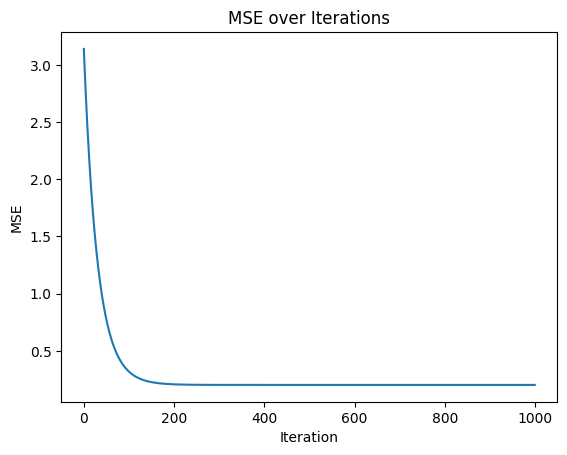

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(0)
X_train = np.random.randn(100, 3)
W_true = np.random.randn(3)
b_true = np.random.randn(1)
Y_train = np.dot(X_train, W_true) + b_true + np.random.randn(100) * 0.5

# 학습률
alpha = 0.01
# 반복 횟수
iterations = 1000

def compute_gradients(X, Y_true, Y_pred):
    n = len(Y_true)
    dW = (2/n) * np.dot(X.T, (Y_pred - Y_true))
    db = (2/n) * np.sum(Y_pred - Y_true)
    return dW, db

# 가중치 및 바이어스 초기화
W = np.random.randn(3)
b = np.random.randn(1)

# 경사 하강법을 통한 학습
mse_history = []

for i in range(iterations):
    # 예측값 계산
    Y_pred = np.dot(X_train, W) + b
    # 기울기 계산
    dW, db = compute_gradients(X_train, Y_train, Y_pred)
    # 가중치 및 바이어스 업데이트
    W = W - alpha * dW
    b = b - alpha * db
    # MSE 계산 및 출력
    mse = np.mean((Y_pred - Y_train) ** 2)
    mse_history.append(mse)
    if i % 100 == 0:
        print(f"Iteration {i}, MSE: {mse}")

print("Final weights:", W)
print("Final bias:", b)

# 검증 데이터 생성
np.random.seed(1)
X_test = np.random.randn(100, 3)
Y_test = np.dot(X_test, W_true) + b_true + np.random.randn(100) * 0.5

# 검증 데이터에 대한 예측
Y_pred_test = np.dot(X_test, W) + b

# 훈련 데이터 및 예측 결과 시각화
plt.scatter(X_train[:, 0], Y_train, color='blue', label='Training Data')
plt.scatter(X_train[:, 0], Y_pred, color='red', label='Training Predictions')
plt.xlabel('X[:, 0]')
plt.ylabel('Y')
plt.legend()
plt.title('Training Data and Predictions')
plt.show()

# 검증 데이터 및 예측 결과 시각화
plt.scatter(X_test[:, 0], Y_test, color='green', label='Validation Data')
plt.scatter(X_test[:, 0], Y_pred_test, color='purple', label='Validation Predictions')
plt.xlabel('X[:, 0]')
plt.ylabel('Y')
plt.legend()
plt.title('Validation Data and Predictions')
plt.show()

# 학습 과정 동안의 MSE 시각화
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.show()


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])

print(data)
plt.scatter(data['area'], data['price'])
plt.show()



data = (data - data.min()) / (data.max() - data.min())  #Normalize



model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()


model.compile(loss='mean_squared_error', optimizer='sgd')


model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

y_pred = model.predict(data['area'])

plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()


         area       price
0   29.410131  760.253272
1   26.000393  679.009826
2   27.446845  738.171124
3   30.602233  817.055825
4   29.668895  791.722374
..        ...         ...
95  26.766433  705.160823
96  25.026250  652.656251
97  29.464676  766.616906
98  25.317280  678.932006
99  26.004973  691.124335

[100 rows x 2 columns]


146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: mpg, Length: 314, dtype: float64


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ ?                      │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 631.2477 - val_loss: 632.3767
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 600.8923 - val_loss: 616.5778
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 555.8572 - val_loss: 602.3307
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 581.3075 - val_loss: 587.3709
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 570.8572 - val_loss: 570.0653
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 563.3123 - val_loss: 549.1105
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 546.9545 - val_loss: 523.4717
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 505.1164 - val_loss: 492.4194
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 463.8667 - val_loss: 454.7311
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 432.9924 - val_loss: 410.4919
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 408.6927 - val_loss: 360.3649
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

Text(0, 0.5, 'Count')

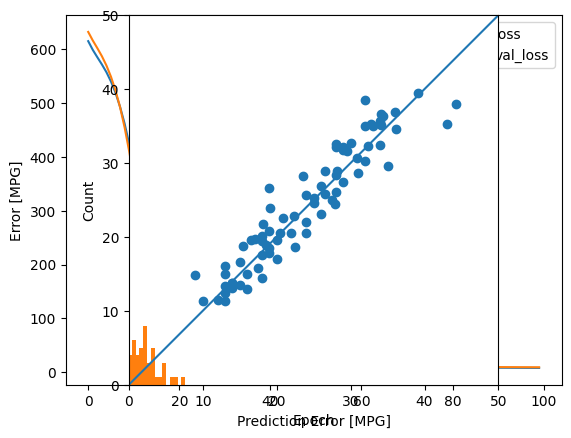

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns
     

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

data = pd.read_csv(url, names=column_names,
                    na_values='?', comment='\t',
                    sep=' ', skipinitialspace=True)

     

data = data.drop('origin', axis=1)
# print(data.isna().sum())
data = data.dropna()

train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

# sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year']], diag_kind='kde')


train_features = train_dataset.copy()
test_features = test_dataset.copy() 

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

print(train_labels) ### 각각의 차들의 연비

data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))

model = K.Sequential([
                      data_normalizer,
                      Dense(64,  activation='relu'),
                      Dense(32,  activation='relu'),
                      Dense(1,  activation=None)
])
model.summary()


model.compile(optimizer='adam', loss='mean_squared_error')
     

history = model.fit(x=train_features,y=train_labels, epochs=100, verbose=1, validation_split=0.2)
     


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)






3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


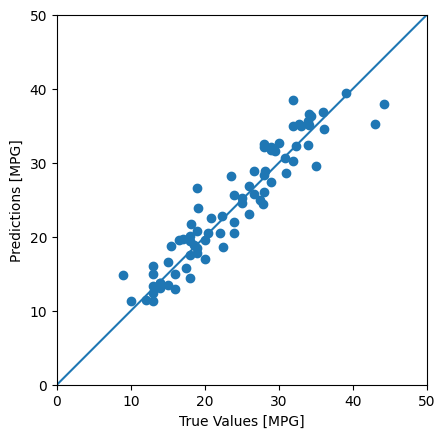

In [16]:
y_pred = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0, 0.5, 'Count')

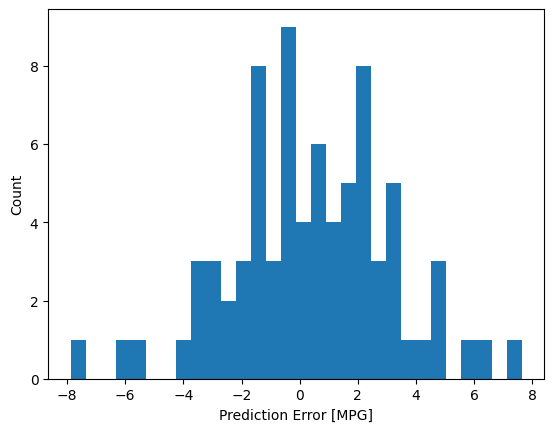

In [17]:
error = y_pred - test_labels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten


((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.mnist.load_data()
RESHAPED = 784
#
reshaped_train_data = train_data.reshape(60000, RESHAPED)
first_image = train_data[0]
reshaped_first_image = reshaped_train_data[0]

# 28x28 픽셀 값을 출력
for row in first_image:
    for pixel in row:
        print(f"{pixel:3}", end=" ")
    print()
print('\n')
for i in reshaped_first_image:
    print(f"{i:3}", end=" ")



  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

# MNIST dataset에 logistic regression 적용



In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

     

((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()
     

train_data = train_data/np.float32(255) ## 정규화
train_labels = train_labels.astype(np.int32)  
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

model = K.Sequential([
                      # Dense(64,  activation='relu'),
                      # Dense(32,  activation='relu'),
                      Flatten(input_shape=(28, 28)),
                      Dense(10, activation='sigmoid')
])
model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/opt/anaconda3/envs/deep/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-07-16 17:22:59.736823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7950 - loss: 0.7841 - val_accuracy: 0.9136 - val_loss: 0.3161
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9096 - loss: 0.3266 - val_accuracy: 0.9196 - val_loss: 0.2901
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9196 - loss: 0.2925 - val_accuracy: 0.9202 - val_loss: 0.2797
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9217 - loss: 0.2774 - val_accuracy: 0.9274 - val_loss: 0.2676
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9219 - loss: 0.2759 - val_accuracy: 0.9265 - val_loss: 0.2661
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9261 - loss: 0.2618 - val_accuracy: 0.9281 - val_loss: 0.2653
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9249 - loss: 0.2622 - val_accuracy: 0.9274 - val_loss: 0.2609
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9285 - loss: 0.2523 - val_accurac

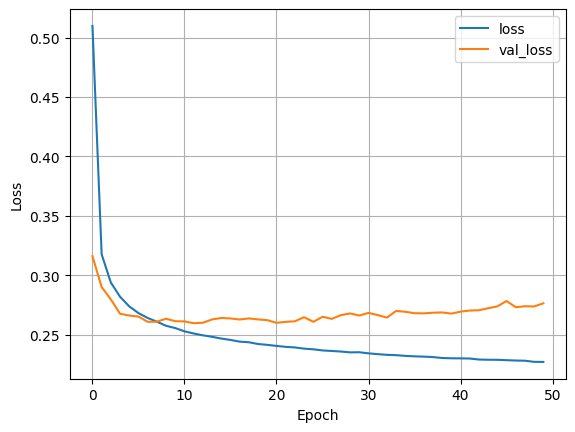

In [6]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
     

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


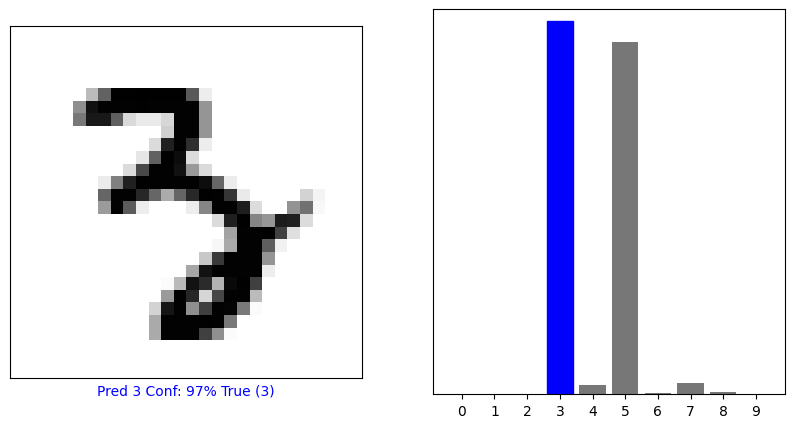

In [11]:
predictions = model.predict(test_data)
     

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
     

i = 87
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()